In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [40]:
df = pd.read_csv('data/zomato_restaurants_dataset.csv')
print(df.head())

  Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
0      Doner King            3.9              4.2            39   
1      Doner King            3.9              4.2            39   
2      Doner King            3.9              4.2            39   
3      Doner King            3.9              4.2            39   
4      Doner King            3.9              4.2            39   

   Delivery Votes   Cuisine  Place Name        City                 Item Name  \
0               0  Fast Food   Malakpet   Hyderabad       Platter Kebab Combo   
1               0  Fast Food   Malakpet   Hyderabad   Chicken Rumali Shawarma   
2               0  Fast Food   Malakpet   Hyderabad    Chicken Tandoori Salad   
3               0  Fast Food   Malakpet   Hyderabad         Chicken BBQ Salad   
4               0  Fast Food   Malakpet   Hyderabad  Special Doner Wrap Combo   

  Best Seller  Votes  Prices  
0  BESTSELLER     84   249.0  
1  BESTSELLER     45   129.0  
2         NaN    

In [41]:
null_values = df.isna().sum()
print(null_values)

Restaurant Name        0
Dining Rating      32236
Delivery Rating     1280
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64


In [42]:
# restaurant_name = df['Restaurant Name']

df.drop(columns=['Item Name', 'Best Seller', 'Votes'], inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Prices           123657 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.5+ MB
None


In [43]:
# Drops only rows where both 'Dining Rating' and 'Delivery Rating'columns have null values
df.dropna(subset=['Dining Rating', 'Delivery Rating'], inplace=True, how='all')

In [45]:
df['Dining Rating'] = df['Dining Rating'].fillna(df['Delivery Rating'].mean())
df['Delivery Rating'] = df['Delivery Rating'].fillna(df['Delivery Rating'].mean())

In [50]:
# Selecting and Scaling Features
features = df[['Dining Rating', 'Delivery Rating', 'Dining Votes', 'Delivery Votes', 'Prices']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [85]:
# Create and Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

labels = kmeans.labels_
df['labels'] = labels
df.groupby('labels')[['Dining Rating', 'Delivery Rating', 'Dining Votes', 'Delivery Votes', 'Prices']].mean().round(2)
centroids = kmeans.cluster_centers_

In [86]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
print(pca_features)

[[ 0.48609897  0.34044373]
 [ 0.39914371  0.02211637]
 [ 0.44262134  0.18128005]
 ...
 [-0.29676809  2.32419708]
 [-0.29676809  2.32419708]
 [-0.24604419  2.50988804]]


In [ ]:
# Print PCA component loadings
pca_df = pd.DataFrame(pca.components_, columns=features.columns, index=['PCA1', 'PCA2'])
pca_df.T

,PCA1,PCA2
Dining Rating,0.510714,0.367469
Delivery Rating,0.497171,0.375532
Dining Votes,0.534380,-0.376057
Delivery Votes,-0.432327,0.566452
Prices,0.139729,0.511524


In [92]:
print(df.groupby('labels')[['Dining Rating', 'Delivery Rating', 'Dining Votes', 'Delivery Votes', 'Prices']].mean().round(2))

        Dining Rating  Delivery Rating  Dining Votes  Delivery Votes  Prices
labels                                                                      
0                4.02             4.05        630.31            3.61  248.92
1                3.58             3.74         93.77           37.38  212.68
2                3.80             3.93         29.97          677.78  246.61
3                4.01             4.10         67.11           27.80  257.31


In [98]:
label_map = {
    0: 'High-Volume Dine-In',
    1: 'Budget Low-Traffic',
    2: 'Delivery-Centric',
    3: 'Premium All-Rounder'
}

# Create a new column with descriptive labels
df['Segment'] = df['labels'].map(label_map)

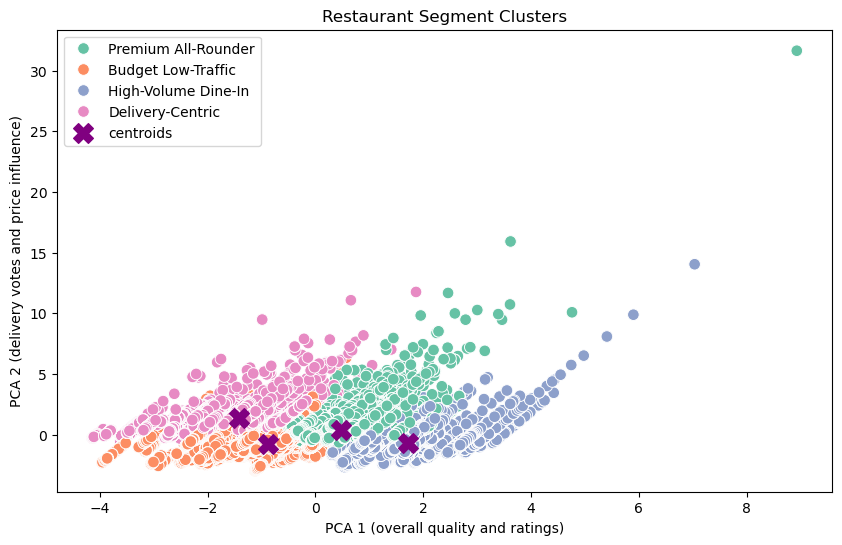

In [108]:
centroids_2d = pca.transform(centroids)

plt.figure(figsize=(10,6))
plt.title('Restaurant Segment Clusters')
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=df['Segment'], palette='Set2', s=70)
plt.scatter(centroids_2d[:,0], centroids_2d[:,1], s=200, marker='X', color='purple', label='centroids')
plt.xlabel('PCA 1 (overall quality and ratings)')
plt.ylabel('PCA 2 (delivery votes and price influence)')
plt.legend()
plt.show()

In [109]:
plt.savefig('..visualsrestaurant_segments.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>